# STOCK PREDICTION USING TESLA STOCK DATASET

Name:Dik Sharma
USN:1DS22MC029

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

C:\Users\ROG\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import keras
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras. models import Sequential
from keras. layers import Dense
import keras. backend as K
from keras. callbacks import EarlyStopping
from keras. optimizers import Adam
from keras. models import load_model
from keras. layers import LSTM
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report

In [3]:
df=pd.read_csv('TSLA.csv',index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [4]:
print("Dataframe Shape: ", df. shape)
print("Null Value Present:" , df.isnull().values.any())

Dataframe Shape:  (2956, 6)
Null Value Present: False


In [5]:
df.columns
df2=df

In [6]:
df2['Open-Close'] = df2.Open - df2.Close

df2['High-Low'] = df2.High - df2.Low


X2 = df2[['Open-Close', 'High-Low']]

print(X2.head())

            Open-Close  High-Low
Date                            
2010-06-29      -0.978     1.492
2010-06-30       0.392     1.424
2010-07-01       0.608     1.130
2010-07-02       0.760     0.878
2010-07-06       0.778     0.834


In [7]:
y2 = np.where(df2['Close'].shift(-1) > df2['Close'], 1, 0)

print(y2)

[0 0 0 ... 1 1 0]


In [8]:
split = int(0.9*len(df))

# Train data set

X_train = X2[:split]

y_train = y2[:split]

# Test data set

X_test = X2[split:]

y_test = y2[split:]

In [9]:
model = SVC().fit(X_train, y_train)
predc=model.predict(X_test)

In [12]:
accuracy_tr = accuracy_score(y_train, model.predict(X_train))
accuracy_t = accuracy_score(y_test, model.predict(X_test))

valsvm=accuracy_score(y_test, model.predict(X_test))

print('SVM Algorithm: ')
print ('Train_data Accuracy: %.2f' %accuracy_tr)
print ('Test_data Accuracy: %.2f' %accuracy_t)

report = classification_report(y_test,model.predict(X_test))
print(report)

SVM Algorithm: 
Train_data Accuracy: 0.53
Test_data Accuracy: 0.50
              precision    recall  f1-score   support

           0       0.45      0.21      0.28       141
           1       0.52      0.77      0.62       155

    accuracy                           0.50       296
   macro avg       0.49      0.49      0.45       296
weighted avg       0.49      0.50      0.46       296



In [13]:
df2['sig'] = model.predict(X2)
print(df2['sig'])

Date
2010-06-29    1
2010-06-30    1
2010-07-01    1
2010-07-02    1
2010-07-06    1
             ..
2022-03-18    1
2022-03-21    1
2022-03-22    1
2022-03-23    0
2022-03-24    1
Name: sig, Length: 2956, dtype: int32


In [15]:
knn = KNeighborsClassifier(n_neighbors=15)

# fit the model
knn.fit(X_train, y_train)

valknn=accuracy_score(y_test, knn.predict(X_test))

# Accuracy Score
accuracy_train = accuracy_score(y_train, knn.predict(X_train))
accuracy_test = accuracy_score(y_test, knn.predict(X_test))

print('KNN Algorithm: ')
print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

report = classification_report(y_test,knn.predict(X_test))
print(report)

KNN Algorithm: 
Train_data Accuracy: 0.60
Test_data Accuracy: 0.52
              precision    recall  f1-score   support

           0       0.48      0.18      0.26       141
           1       0.52      0.83      0.64       155

    accuracy                           0.52       296
   macro avg       0.50      0.50      0.45       296
weighted avg       0.50      0.52      0.46       296



In [17]:
clf=RandomForestClassifier()
models = clf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score

valran=accuracy_score(y_test, models.predict(X_test))

accuracy_train = accuracy_score(y_train, models.predict(X_train))
accuracy_test = accuracy_score(y_test, models.predict(X_test))

print('Random Forest Algorithm: ')
print('Correct Prediction (%): ', accuracy_score(y_test, models.predict(X_test), normalize=True)*100.0)
print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

report = classification_report(y_test, models.predict(X_test))
print(report)

Random Forest Algorithm: 
Correct Prediction (%):  46.62162162162162
Train_data Accuracy: 1.00
Test_data Accuracy: 0.47
              precision    recall  f1-score   support

           0       0.41      0.28      0.34       141
           1       0.49      0.63      0.55       155

    accuracy                           0.47       296
   macro avg       0.45      0.46      0.44       296
weighted avg       0.45      0.47      0.45       296



<AxesSubplot:xlabel='Date'>

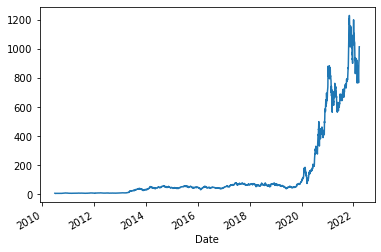

In [18]:
df['Adj Close'].plot()

In [19]:
#Set Target Variable
output_var = pd.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [20]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2010-06-29,0.000465,0.001350,0.000422,0.306605
2010-06-30,0.001568,0.002224,0.001371,0.280640
2010-07-01,0.001439,0.001498,0.000871,0.133184
2010-07-02,0.001114,0.001043,0.000614,0.082560
2010-07-06,0.000627,0.000543,0.000140,0.110956


In [21]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [22]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [23]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [24]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
336/336 [==============================] - 1s 2ms/step - loss: 21316.3652
Epoch 2/100
336/336 [==============================] - 1s 2ms/step - loss: 20737.4609
Epoch 3/100
336/336 [==============================] - 1s 2ms/step - loss: 20167.3594
Epoch 4/100
336/336 [==============================] - 1s 2ms/step - loss: 19501.8340
Epoch 5/100
336/336 [==============================] - 0s 1ms/step - loss: 18765.2324
Epoch 6/100
336/336 [==============================] - 0s 1ms/step - loss: 17994.1562
Epoch 7/100
336/336 [==============================] - 1s 2ms/step - loss: 17225.9492
Epoch 8/100
336/336 [==============================] - 0s 1ms/step - loss: 16491.4258
Epoch 9/100
336/336 [==============================] - 0s 1ms/step - loss: 15811.5205
Epoch 10/100
336/336 [==============================] - 1s 2ms/step - loss: 15197.0234
Epoch 11/100
336/336 [==============================] - 0s 1ms/step - loss: 14650.1309
Epoch 12/100
336/336 [==============================

In [25]:
y_pred= lstm.predict(X_test)

9/9 [==============================] - 0s 1ms/step


In [26]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.8779848912328434

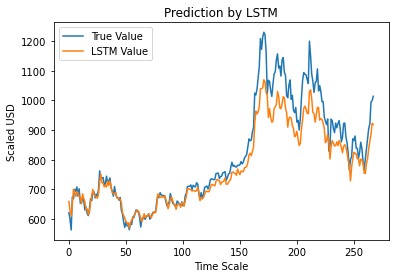

In [27]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()


The Opening Value of the stock, the Highest and Lowest values of that stock on the same day, as well as the Closing Value at the end of the day are all indicated for each date. Furthermore, the total volume of the stocks in the market is provided.



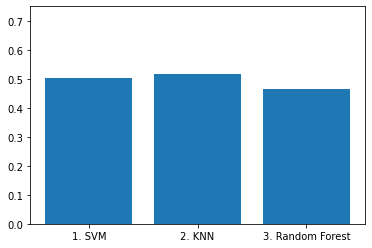

 SVM 	 0.5033783783783784 
 KNN 	  0.5168918918918919 
 Random Forest	 0.46621621621621623


In [37]:
rm=[valsvm,valknn,valran]
rs=['1. SVM','2. KNN','3. Random Forest']
plt.bar(rs,rm)
plt.ylim(0,0.75)
plt.show()
print(' SVM \t',valsvm,'\n KNN \t ',valknn,'\n Random Forest\t',valran)